# Visualization of data and simulations

In this notebook, we illustrate the visualization functions of petab to visualize measurements or simulations.

Some basic visualizations can be generated from a PEtab problem directly, without the need for a visualization specification file. This is illustrated in the first part of this notebook. For more advanced visualizations, a visualization specification file is required. This is illustrated in the second part of this notebook.

For the following demonstrations, we will use two example problems obtained from the [Benchmark collection](https://github.com/Benchmarking-Initiative/Benchmark-Models-PEtab/), [Fujita_SciSignal2010](https://github.com/Benchmarking-Initiative/Benchmark-Models-PEtab/tree/master/Benchmark-Models/Fujita_SciSignal2010) and [Isensee_JCB2018](https://github.com/Benchmarking-Initiative/Benchmark-Models-PEtab/tree/master/Benchmark-Models/Isensee_JCB2018). Their specifics don't matter for the purpose of this notebook—we just need some PEtab problems to work with.

In [21]:
from pathlib import Path

import matplotlib.pyplot as plt
from IPython.display import display

import petab
from petab import Problem
from petab.visualize import plot_problem

example_dir_fujita = Path("example_Fujita")
petab_yaml_fujita = example_dir_fujita / "Fujita.yaml"
example_dir_isensee = Path("example_Isensee")
petab_yaml_isensee = example_dir_isensee / "Isensee_no_vis.yaml"
petab_yaml_isensee_vis = example_dir_isensee / "Isensee.yaml"

# we change some settings to make the plots better readable
petab.visualize.plotting.DEFAULT_FIGSIZE[:] = (10, 8)
plt.rcParams["figure.figsize"] = petab.visualize.plotting.DEFAULT_FIGSIZE

plt.rcParams["font.size"] = 12
plt.rcParams["figure.dpi"] = 150
plt.rcParams["legend.fontsize"] = 10

## Visualization without visualization specification file

### Plotting measurements

For the most basic visualization, we can use the [plot_problem()](https://petab.readthedocs.io/projects/libpetab-python/en/latest/build/_autosummary/petab.visualize.html#petab.visualize.plot_problem) function.

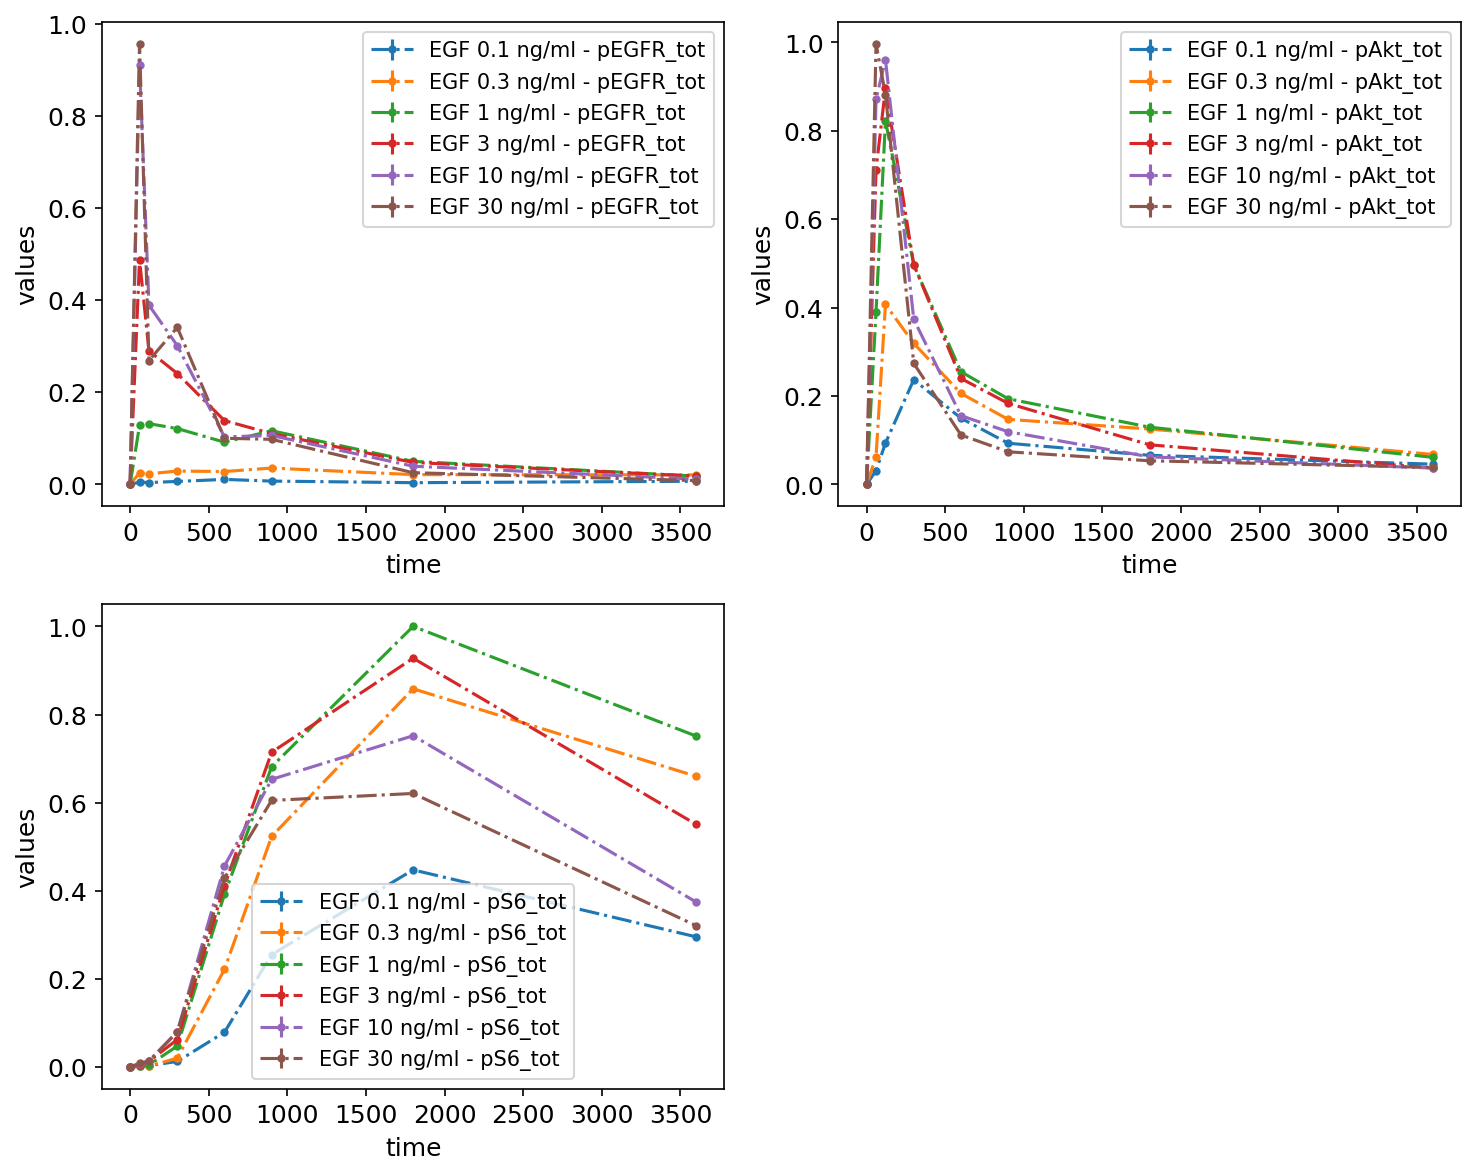

In [2]:
# load PEtab problem
petab_problem = Problem.from_yaml(petab_yaml_fujita)

# plot measurements
petab.visualize.plot_problem(petab_problem);

As nothing was specified regarding what should be plotted, the defaults were used. Namely, it was assumed that measurements are time series data, and they were grouped by observables.

### Subplots / subsetting the data

Measurements or simulations can be grouped by observables, simulation conditions, or datasetIds with the `plot_problem()` function. This can be specified by setting the value of `group_by` parameter to `'observable'` (default), `'simulation'` or `'dataset'` and by providing corresponding ids in `grouping_list`, which is a list of lists. Each sublist specifies a separate plot and its elements are either simulation condition IDs or observable IDs or the dataset IDs.
 
#### By observable

You can specify how many subplots there should be and what should be plotted on each of them. It can easily be done by providing `grouping_list`, which by default specifies, which observables should be plotted on a particular plot. The value of `grouping_list` should be a list of lists, each sublist corresponds to a separate plot.

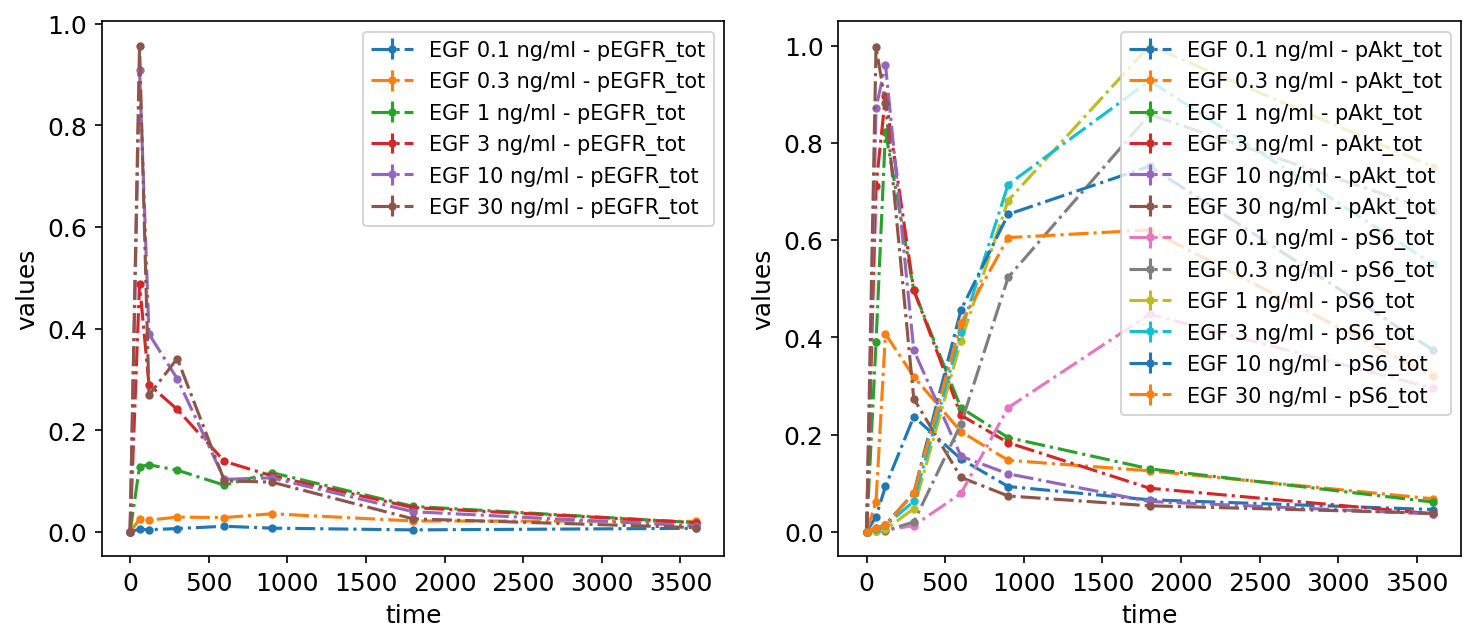

In [3]:
petab.visualize.plot_problem(
    petab_problem, grouping_list=[["pEGFR_tot"], ["pAkt_tot", "pS6_tot"]]
)
plt.gcf().set_size_inches(10, 4)

#### By simulation condition

Another option is to specify which simulation conditions should be plotted:

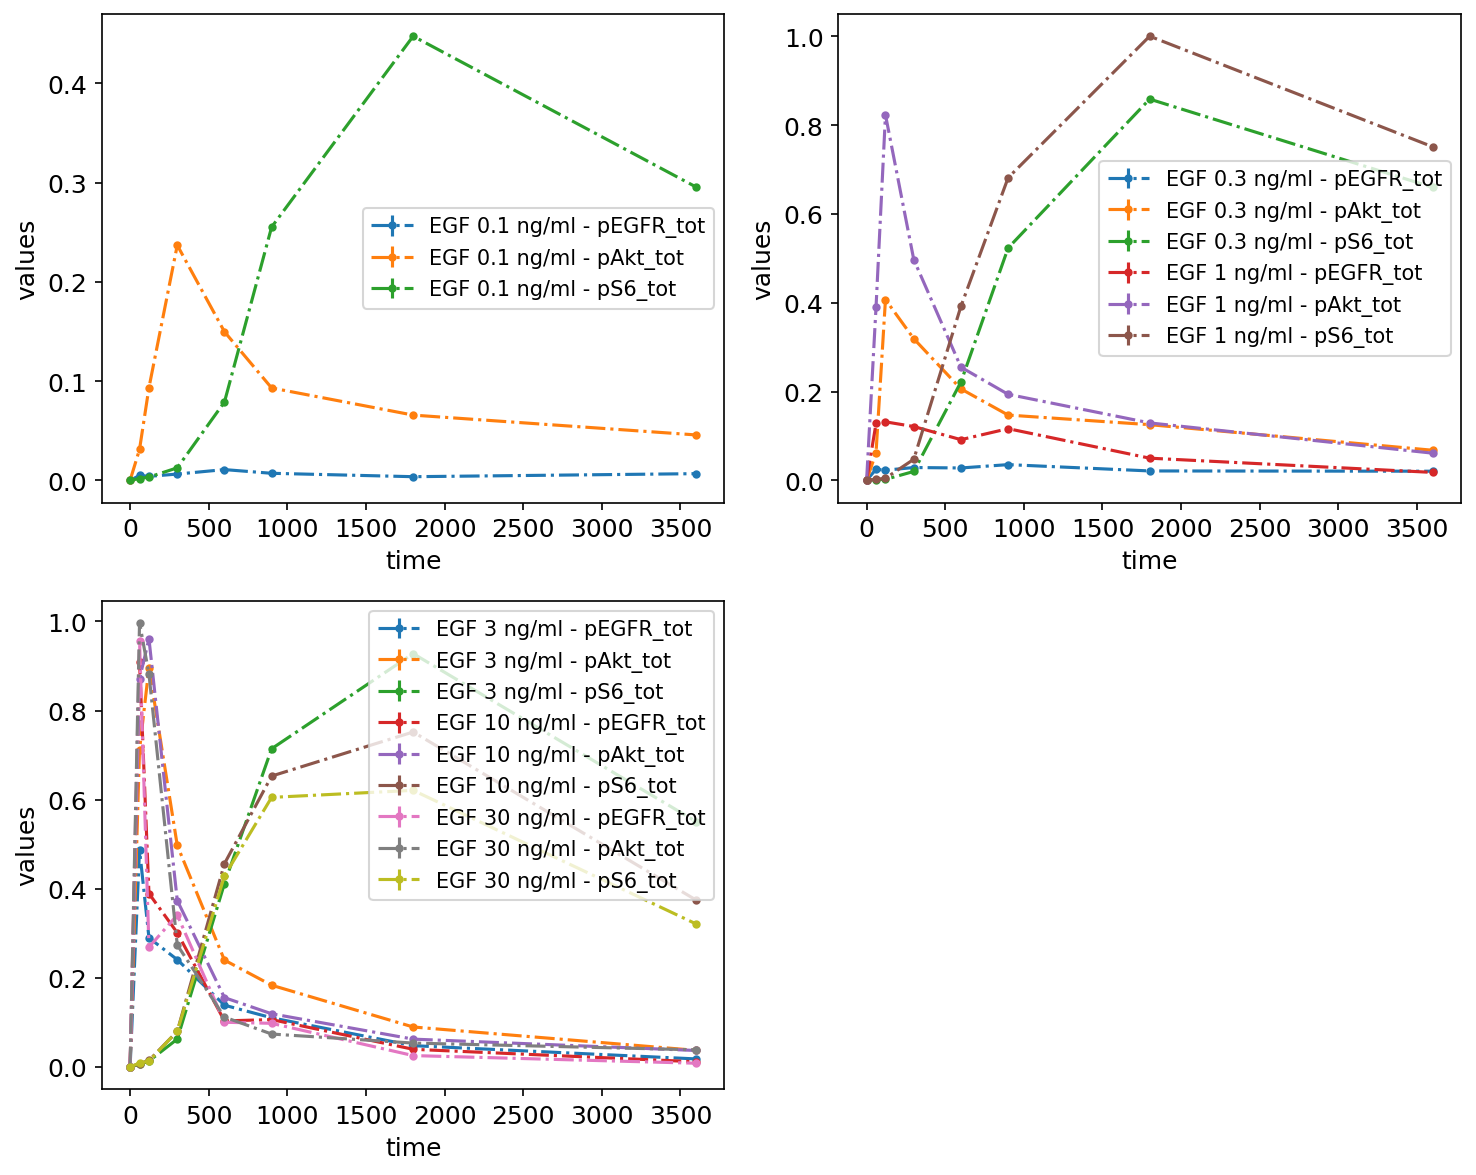

In [4]:
petab.visualize.plot_problem(
    petab_problem,
    grouping_list=[
        ["model1_data1"],
        ["model1_data2", "model1_data3"],
        ["model1_data4", "model1_data5", "model1_data6"],
    ],
    group_by="simulation",
);

#### By datasetId

Finally, measurements can be grouped by `datasetId`s as specified in the measurements table, by passing lists of `datasetId`s. Each sublist corresponds to a subplot:

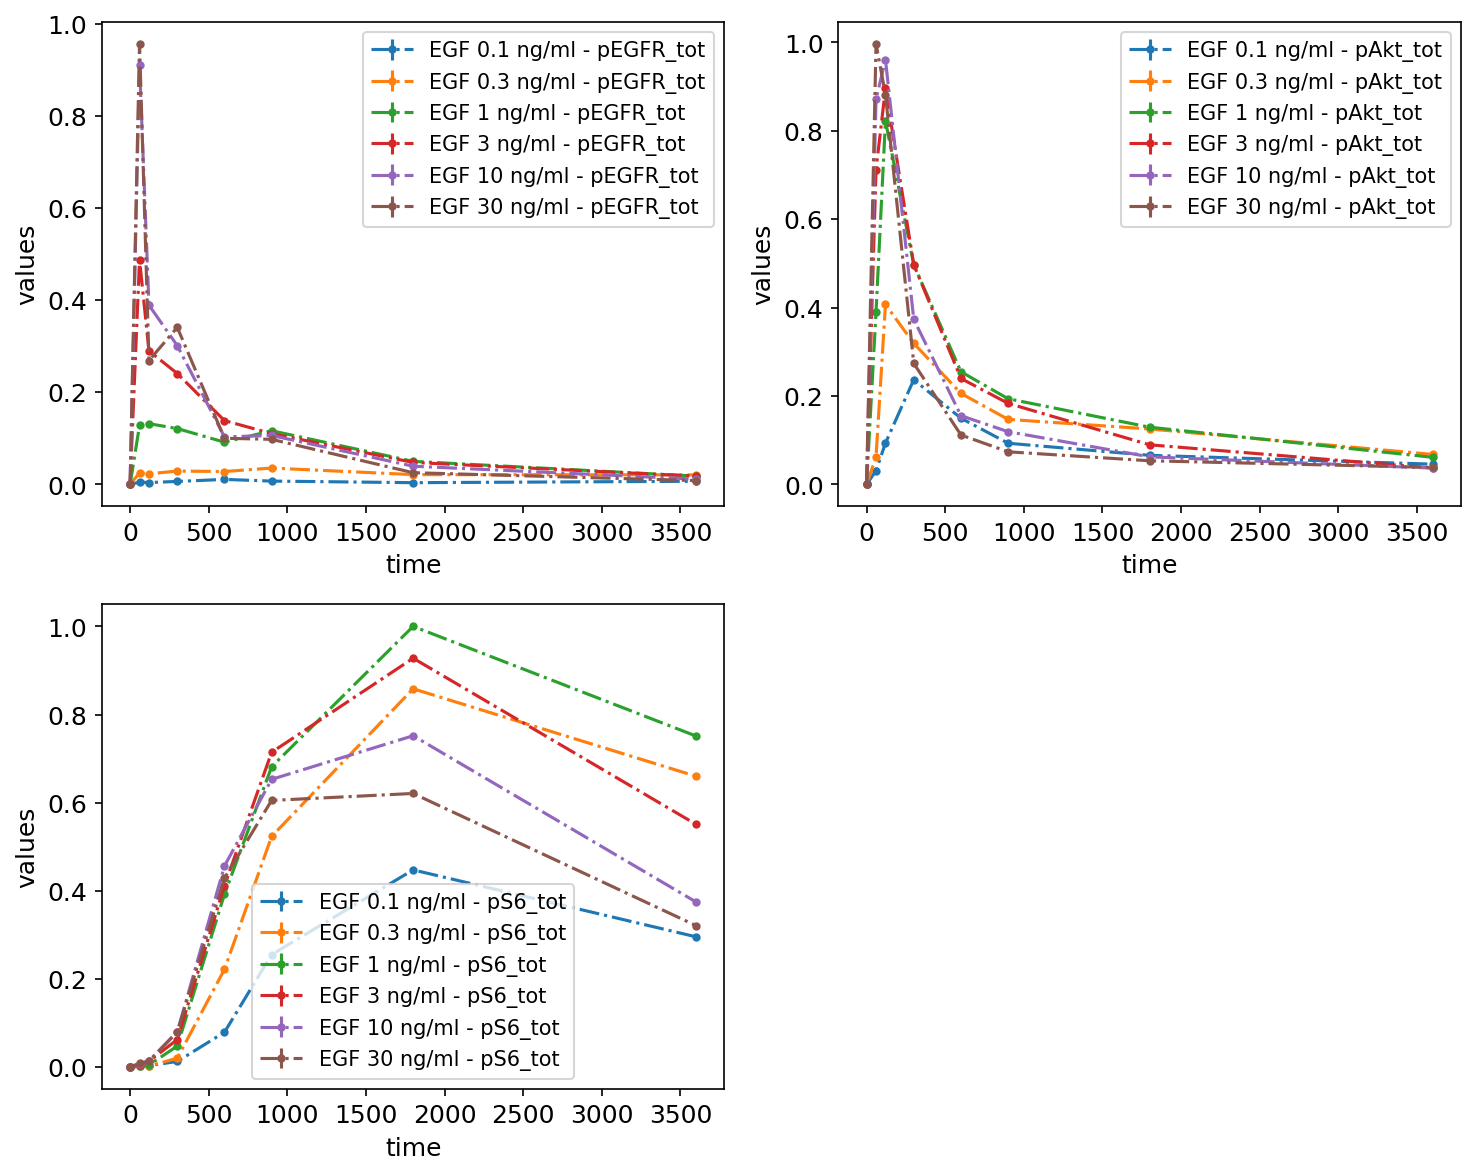

In [5]:
petab.visualize.plot_problem(
    petab_problem,
    grouping_list=[
        [
            "model1_data1_pEGFR_tot",
            "model1_data2_pEGFR_tot",
            "model1_data3_pEGFR_tot",
            "model1_data4_pEGFR_tot",
            "model1_data5_pEGFR_tot",
            "model1_data6_pEGFR_tot",
        ],
        [
            "model1_data1_pAkt_tot",
            "model1_data2_pAkt_tot",
            "model1_data3_pAkt_tot",
            "model1_data4_pAkt_tot",
            "model1_data5_pAkt_tot",
            "model1_data6_pAkt_tot",
        ],
        [
            "model1_data1_pS6_tot",
            "model1_data2_pS6_tot",
            "model1_data3_pS6_tot",
            "model1_data4_pS6_tot",
            "model1_data5_pS6_tot",
            "model1_data6_pS6_tot",
        ],
    ],
    group_by="dataset",
);

### Plotting simulations

We can also plot simulations together with the meausurements, for example, to judge the model fit. For this, we need to provide a simulation file as `simulations_df`. A simulation file has the same format as the measurement file, but instead of the `measurement` column, it contains simulation outputs in the `simulation` column.


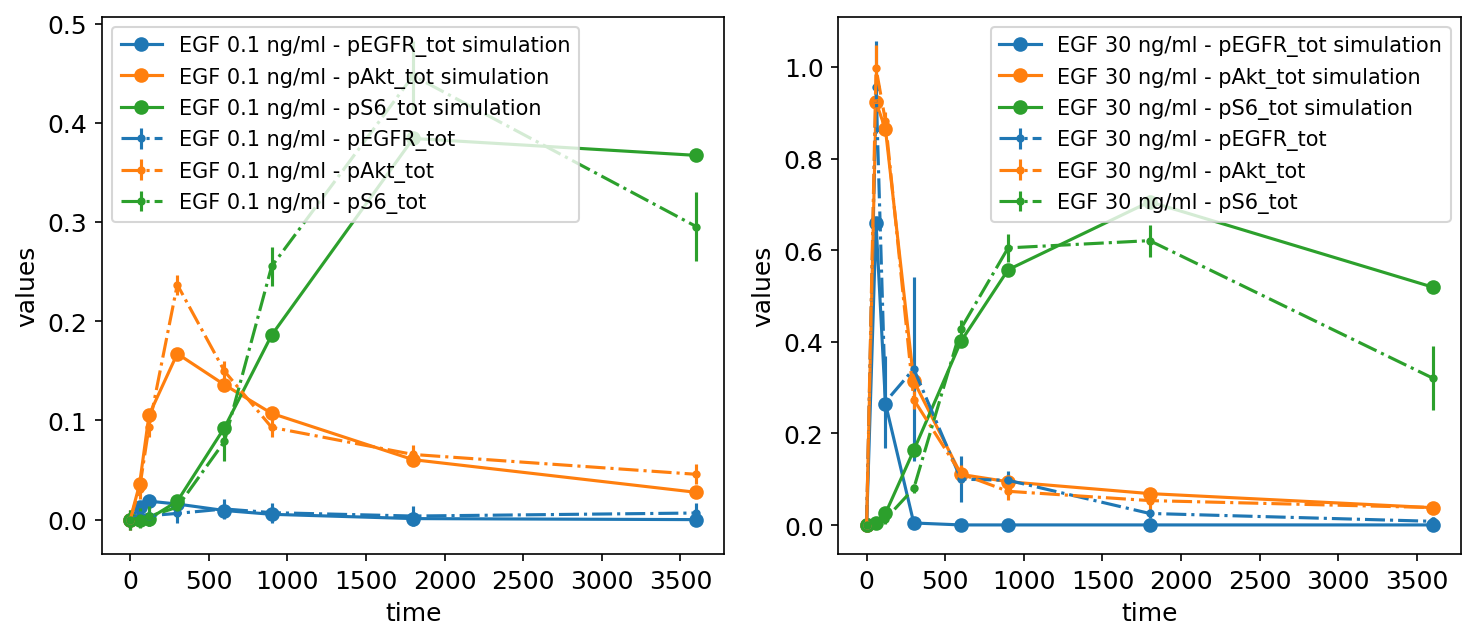

In [6]:
simu_file_Fujita = example_dir_fujita / "Fujita_simulatedData.tsv"

sim_cond_id_list = [
    ["model1_data1"],
    ["model1_data6"],
]
petab_problem = Problem.from_yaml(petab_yaml_fujita)
plot_problem(
    petab_problem,
    simulations_df=simu_file_Fujita,
    grouping_list=sim_cond_id_list,
    group_by="simulation",
    plotted_noise="provided",
)
plt.gcf().set_size_inches(10, 4)

It is also possible to plot only the simulations without the measurements by setting `petab_problem.measurement_df = None`.

## Visualization with a visualization specification file

As described in the [PEtab documentation](https://petab.readthedocs.io/en/latest/documentation_data_format.html), the visualization specification file is a tab-separated value file specifying which data to plot in which way. In the following, we will build up a visualization specification file step by step.

Without a visualization file, the independent variable defaults to time, and each observable is plotted in a separate subplot:

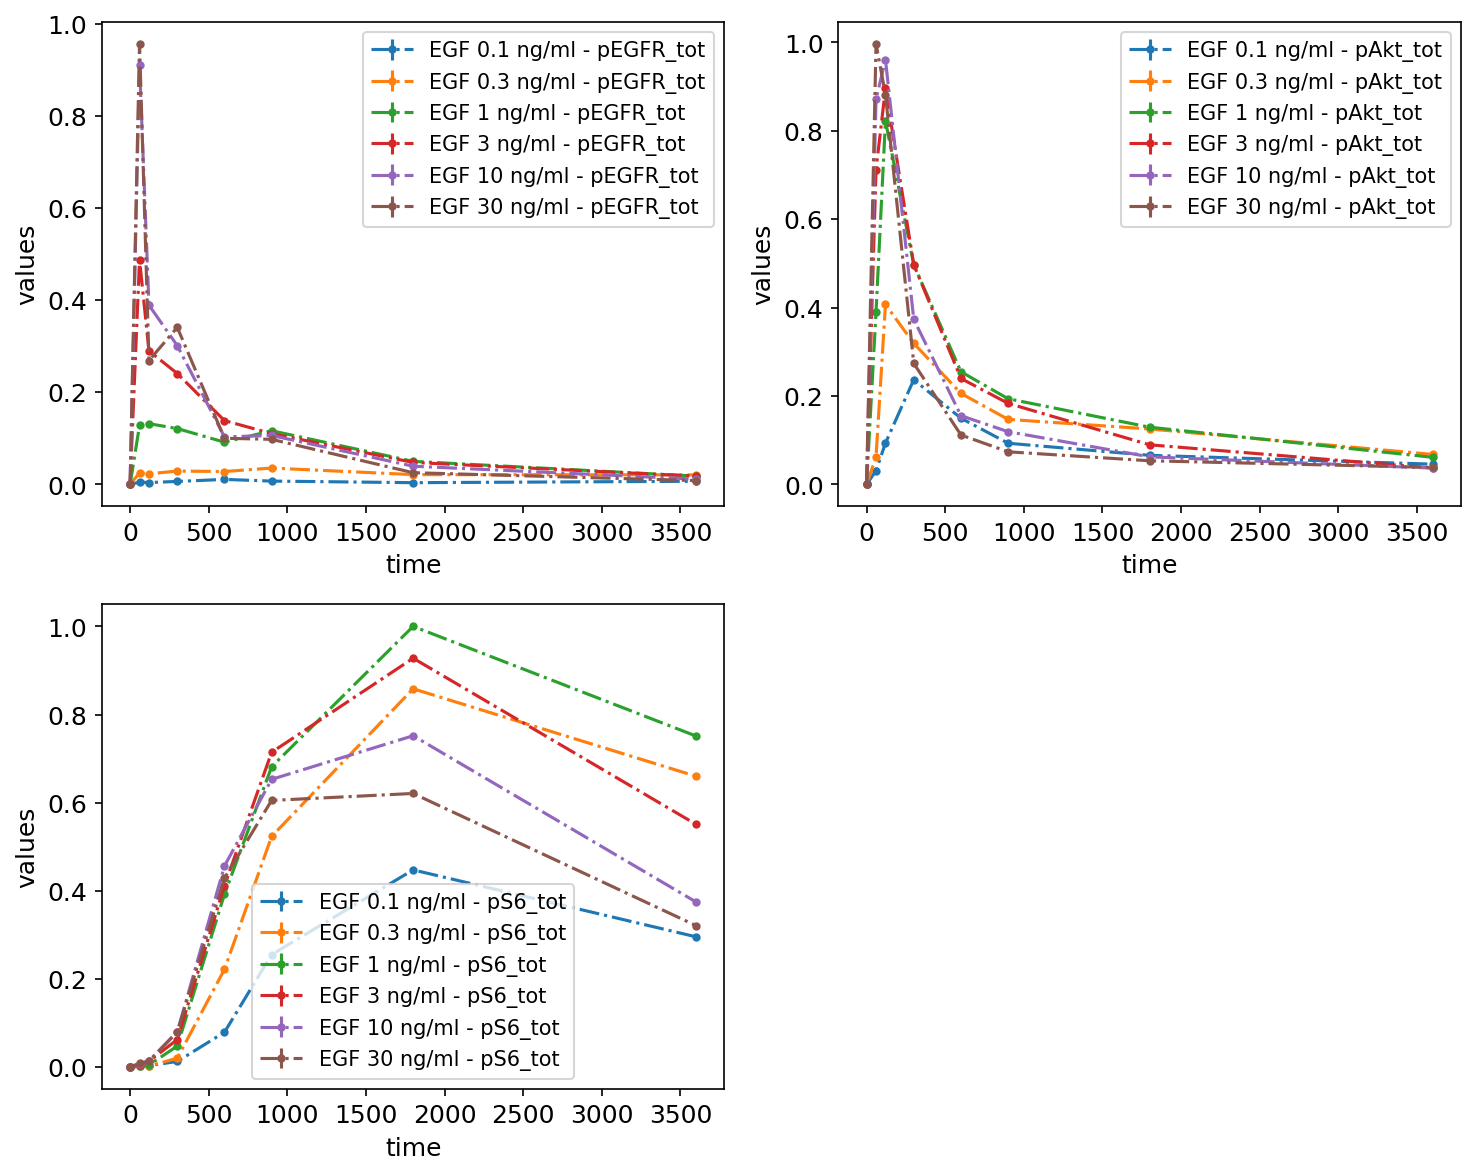

In [7]:
petab_problem = Problem.from_yaml(petab_yaml_fujita)
petab.visualize.plot_problem(petab_problem);

First, let us create a visualization specification file with only mandatory columns. In fact, there is only one mandatory column: `plotId`.
The most basic visualization file looks like this:

In [8]:
petab_problem.visualization_df = petab.get_visualization_df(
    example_dir_fujita / "visuSpecs" / "Fujita_visuSpec_mandatory.tsv"
)
petab_problem.visualization_df

plotId
0  plot1

This way, all data will be shown in a single plot, taking time as independent variable. This is not very appealing yet, but we will improve it step by step.

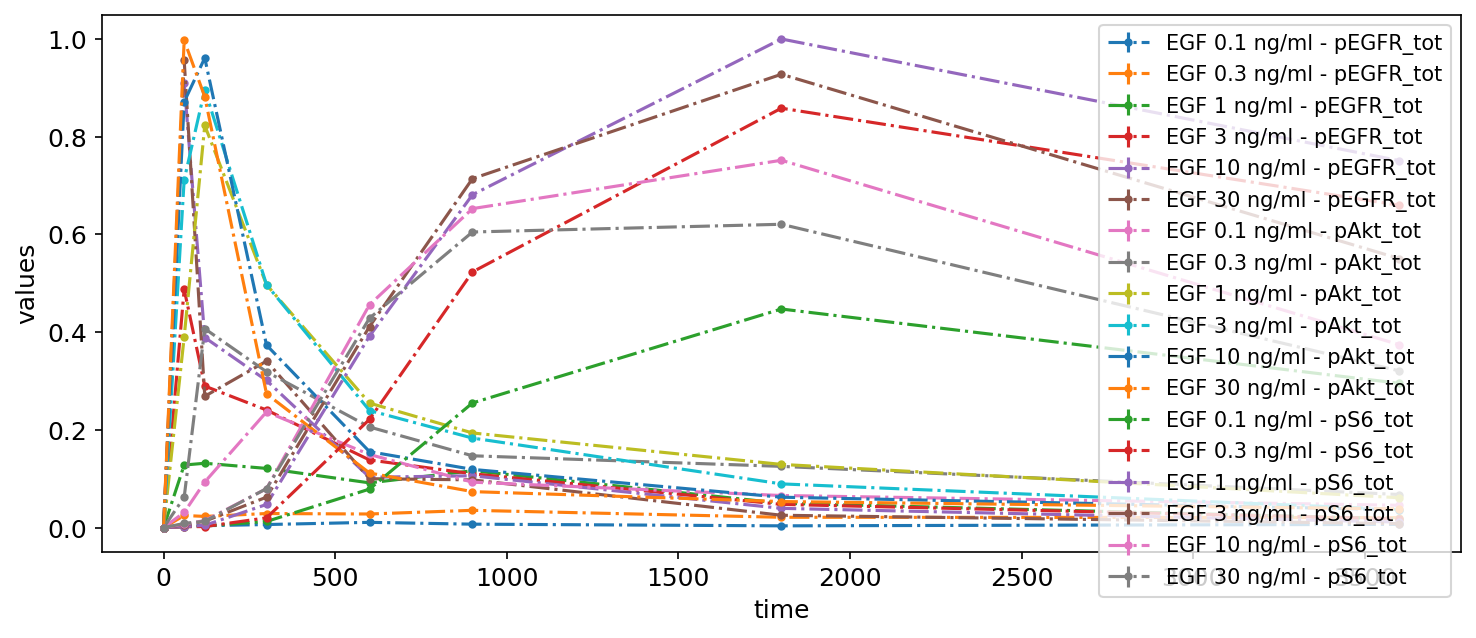

In [9]:
petab.visualize.plot_problem(petab_problem)
plt.gcf().set_size_inches(10, 4)

### Logarithmic scale and offset

Let's change some settings. For example, we can change the scale of the y-axis to logarithmic and apply an offset for the independent variable:

In [10]:
petab_problem.visualization_df = petab.get_visualization_df(
    example_dir_fujita / "visuSpecs" / "Fujita_visuSpec_1.tsv"
)
display(petab_problem.visualization_df)

plotId  xOffset yScale
0  plot1      100    log

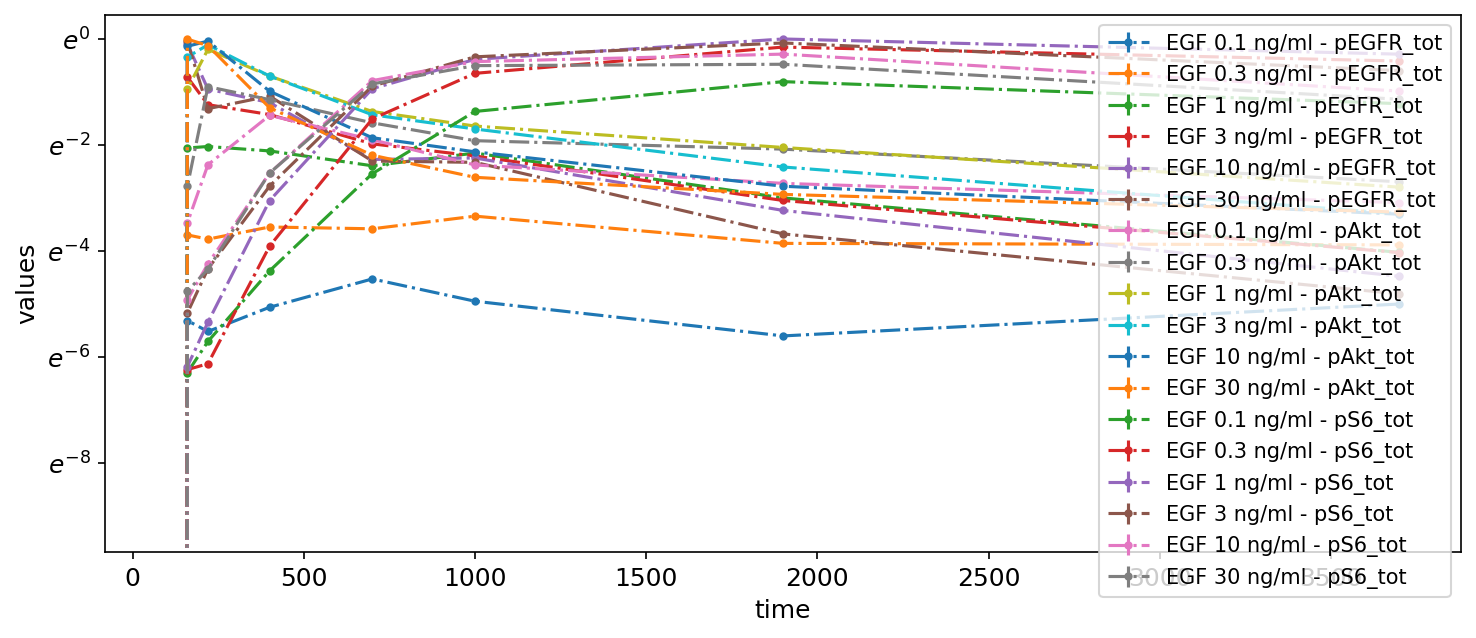

In [11]:
petab.visualize.plot_problem(petab_problem)
plt.gcf().set_size_inches(10, 4)

### Subplots by observable

Next, to make the plot less crowded, we group measurements by observables by adding a second subplot and specifying which observables to plot in each via the `yValues` column:

In [12]:
petab_problem.visualization_df = petab.get_visualization_df(
    example_dir_fujita / "visuSpecs" / "Fujita_visuSpec_2.tsv"
)
petab_problem.visualization_df

plotId    yValues  yOffset yScale                  plotName
0  plot1  pEGFR_tot        0    log               pEGFR total
1  plot2   pAkt_tot      300    lin  pAkt total and pS6 total
2  plot2    pS6_tot      305    lin  pAkt total and pS6 total

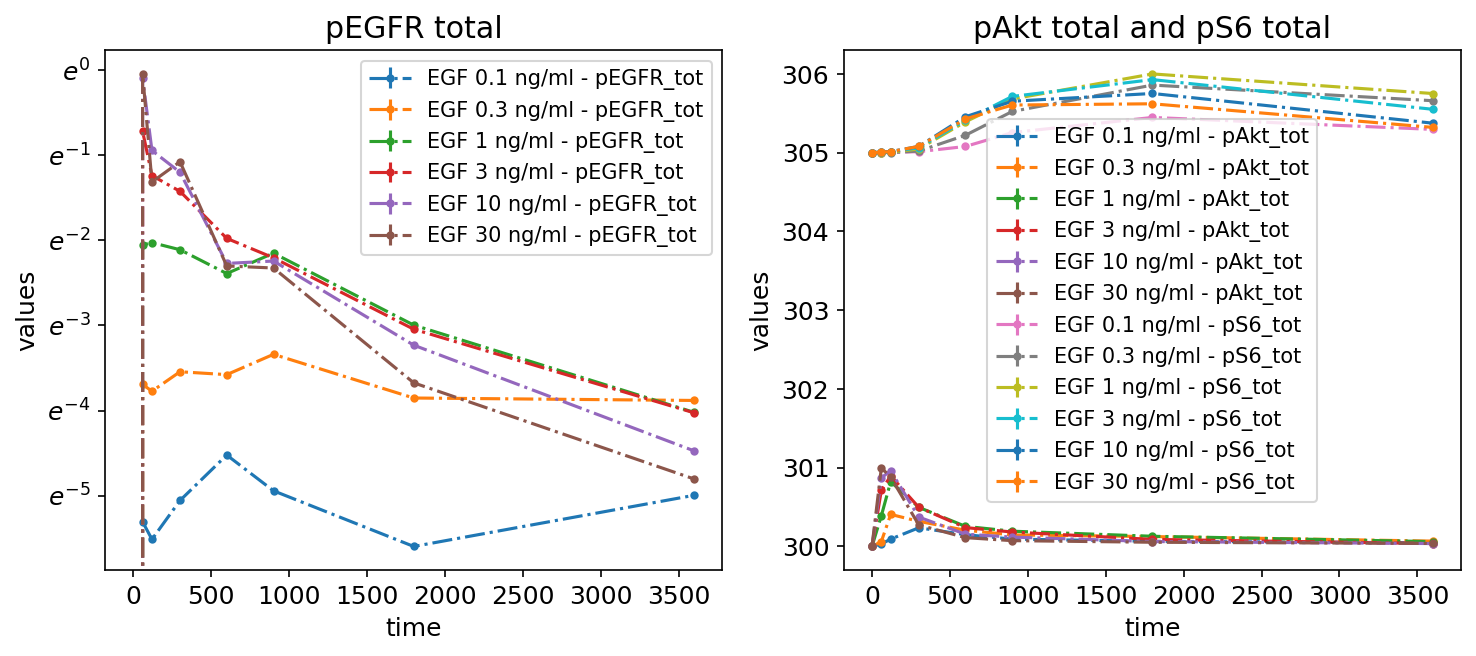

In [13]:
petab.visualize.plot_problem(petab_problem)
plt.gcf().set_size_inches(10, 4)

### Subplots by dataset

We can also plot different datasets (as specified by the optional `datasetId` column in the measurement table) in separate subplots:

In [14]:
petab_problem.visualization_df = petab.get_visualization_df(
    example_dir_fujita
    / "visuSpecs"
    / "Fujita_visuSpec_individual_datasets.tsv"
)
petab_problem.visualization_df

plotId plotTypeSimulation plotTypeData               datasetId xValues
0  plot1           LinePlot     provided  model1_data1_pEGFR_tot    time
1  plot2           LinePlot     provided  model1_data2_pEGFR_tot    time
2  plot2           LinePlot     provided  model1_data3_pEGFR_tot    time
3  plot3           LinePlot     provided  model1_data4_pEGFR_tot    time
4  plot3           LinePlot     provided  model1_data5_pEGFR_tot    time
5  plot3           LinePlot     provided  model1_data6_pEGFR_tot    time

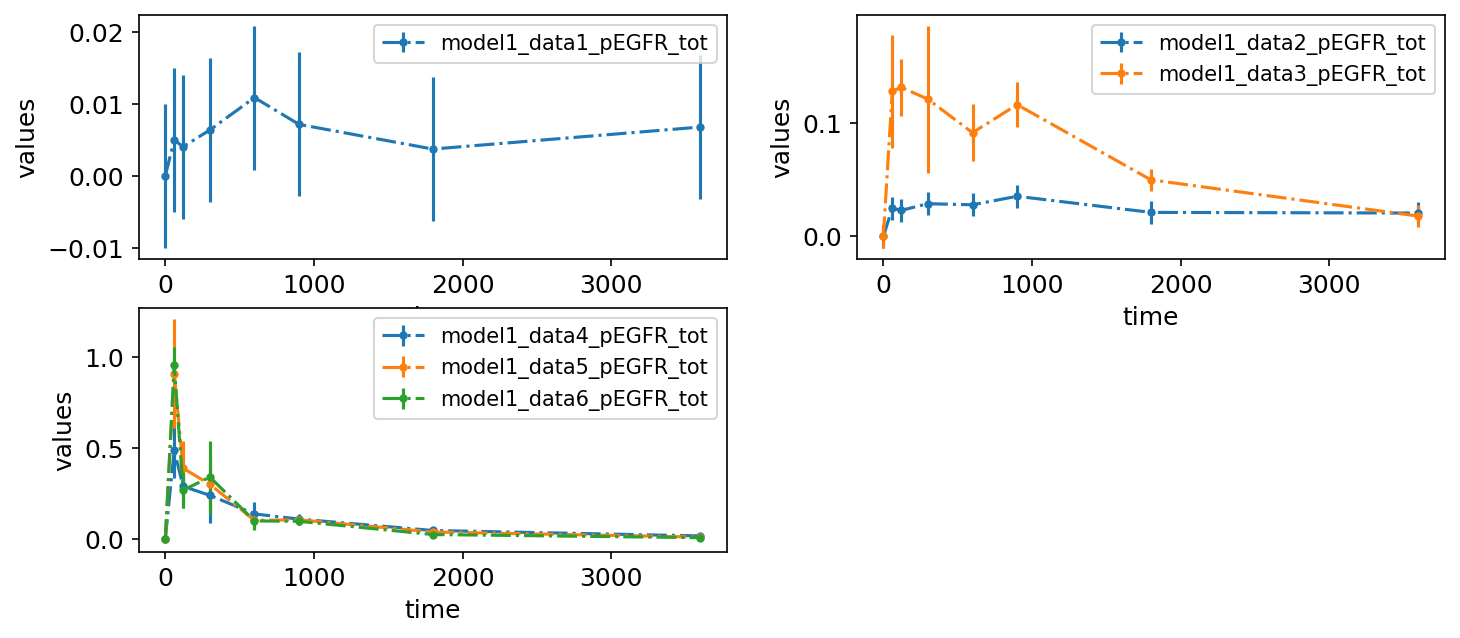

In [15]:
petab.visualize.plot_problem(petab_problem)
plt.gcf().set_size_inches(10, 4)

### Legend entries

So far, the legend entries don't look very nice. We can change them by specifying the desired labels in the `legendEntries` column:

In [16]:
petab_problem.visualization_df = petab.get_visualization_df(
    example_dir_fujita / "visuSpecs" / "Fujita_visuSpec_datasetIds.tsv"
)
petab_problem.visualization_df

plotId plotTypeSimulation plotTypeData               datasetId xValues  \
0   plot1           LinePlot     provided  model1_data1_pEGFR_tot    time   
1   plot1           LinePlot     provided  model1_data2_pEGFR_tot    time   
2   plot1           LinePlot     provided  model1_data3_pEGFR_tot    time   
3   plot1           LinePlot     provided  model1_data4_pEGFR_tot    time   
4   plot1           LinePlot     provided  model1_data5_pEGFR_tot    time   
5   plot1           LinePlot     provided  model1_data6_pEGFR_tot    time   
6   plot2           LinePlot     provided   model1_data1_pAkt_tot    time   
7   plot2           LinePlot     provided   model1_data2_pAkt_tot    time   
8   plot2           LinePlot     provided   model1_data3_pAkt_tot    time   
9   plot2           LinePlot     provided   model1_data4_pAkt_tot    time   
10  plot2           LinePlot     provided   model1_data5_pAkt_tot    time   
11  plot2           LinePlot     provided   model1_data6_pAkt_tot    time   
12  plot3           LinePlot     provided    model1_data1_pS6_tot    time   
13  plot3           LinePlot     provided    model1_data2_pS6_tot    time   
14  plot3           LinePlot     provided    model1_data3_pS6_tot    time   
15  plot3           LinePlot     provided    model1_data4_pS6_tot    time   
16  plot3           LinePlot     provided    model1_data5_pS6_tot    time   
17  plot3           LinePlot     provided    model1_data6_pS6_tot    time   

            legendEntry  
0   Data 1, pEGFR total  
1   Data 2, pEGFR total  
2   Data 3, pEGFR total  
3   Data 4, pEGFR total  
4   Data 5, pEGFR total  
5   Data 6, pEGFR total  
6    Data 1, pAkt total  
7    Data 2, pAkt total  
8    Data 3, pAkt total  
9    Data 4, pAkt total  
10   Data 5, pAkt total  
11   Data 6, pAkt total  
12    Data 1, pS6 total  
13    Data 2, pS6 total  
14    Data 3, pS6 total  
15    Data 4, pS6 total  
16    Data 5, pS6 total  
17    Data 6, pS6 total

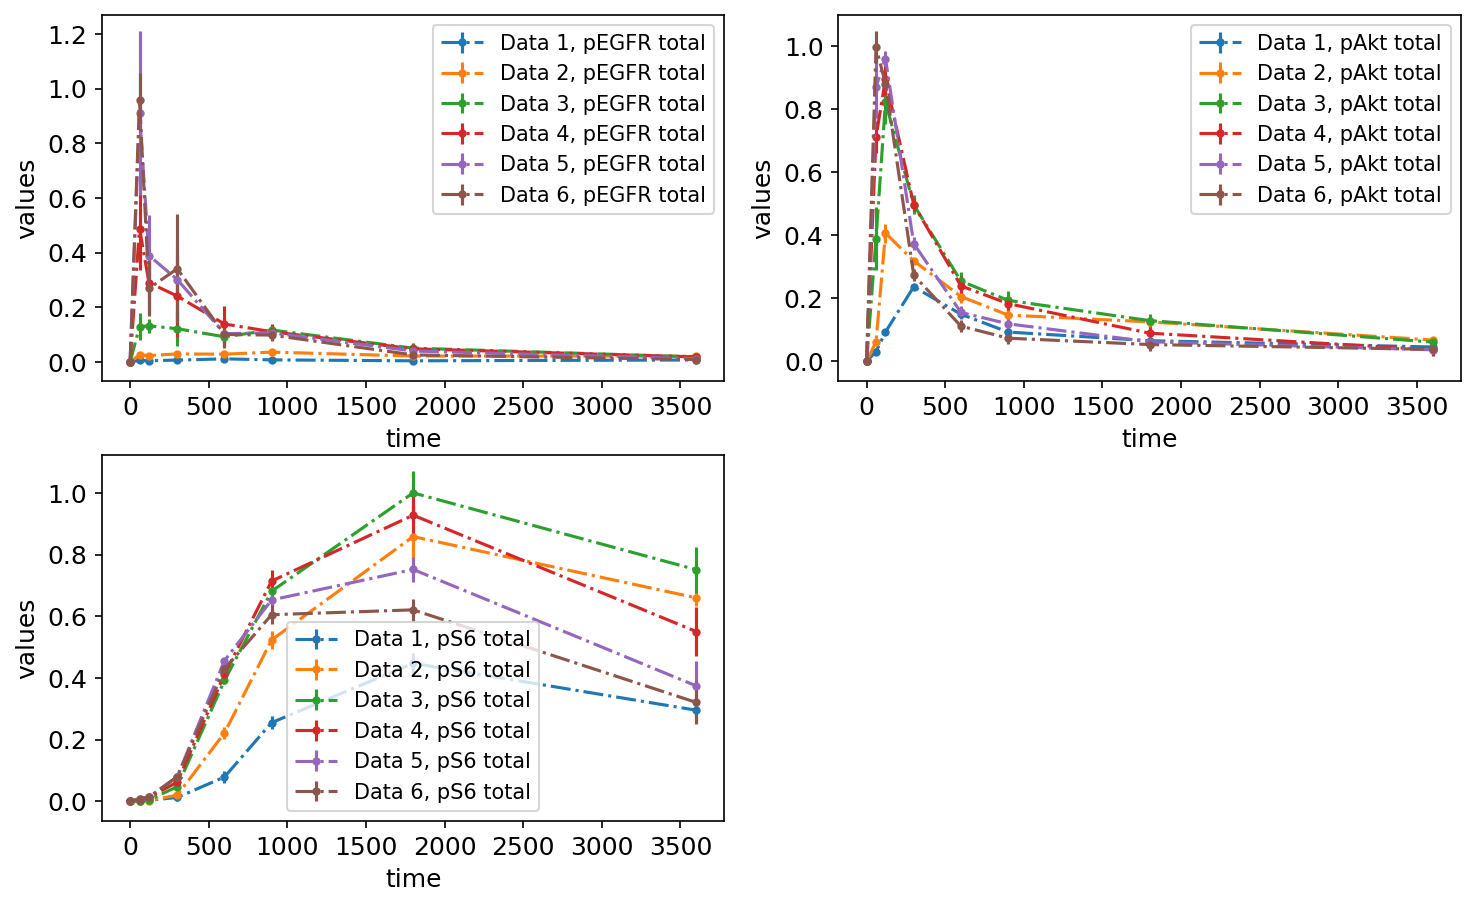

In [17]:
petab.visualize.plot_problem(petab_problem)
plt.gcf().set_size_inches(10, 6)

### Plotting individual replicates

If the measurement file contains replicates, the replicates can also be visualized individually, instead of their means and standard deviations:

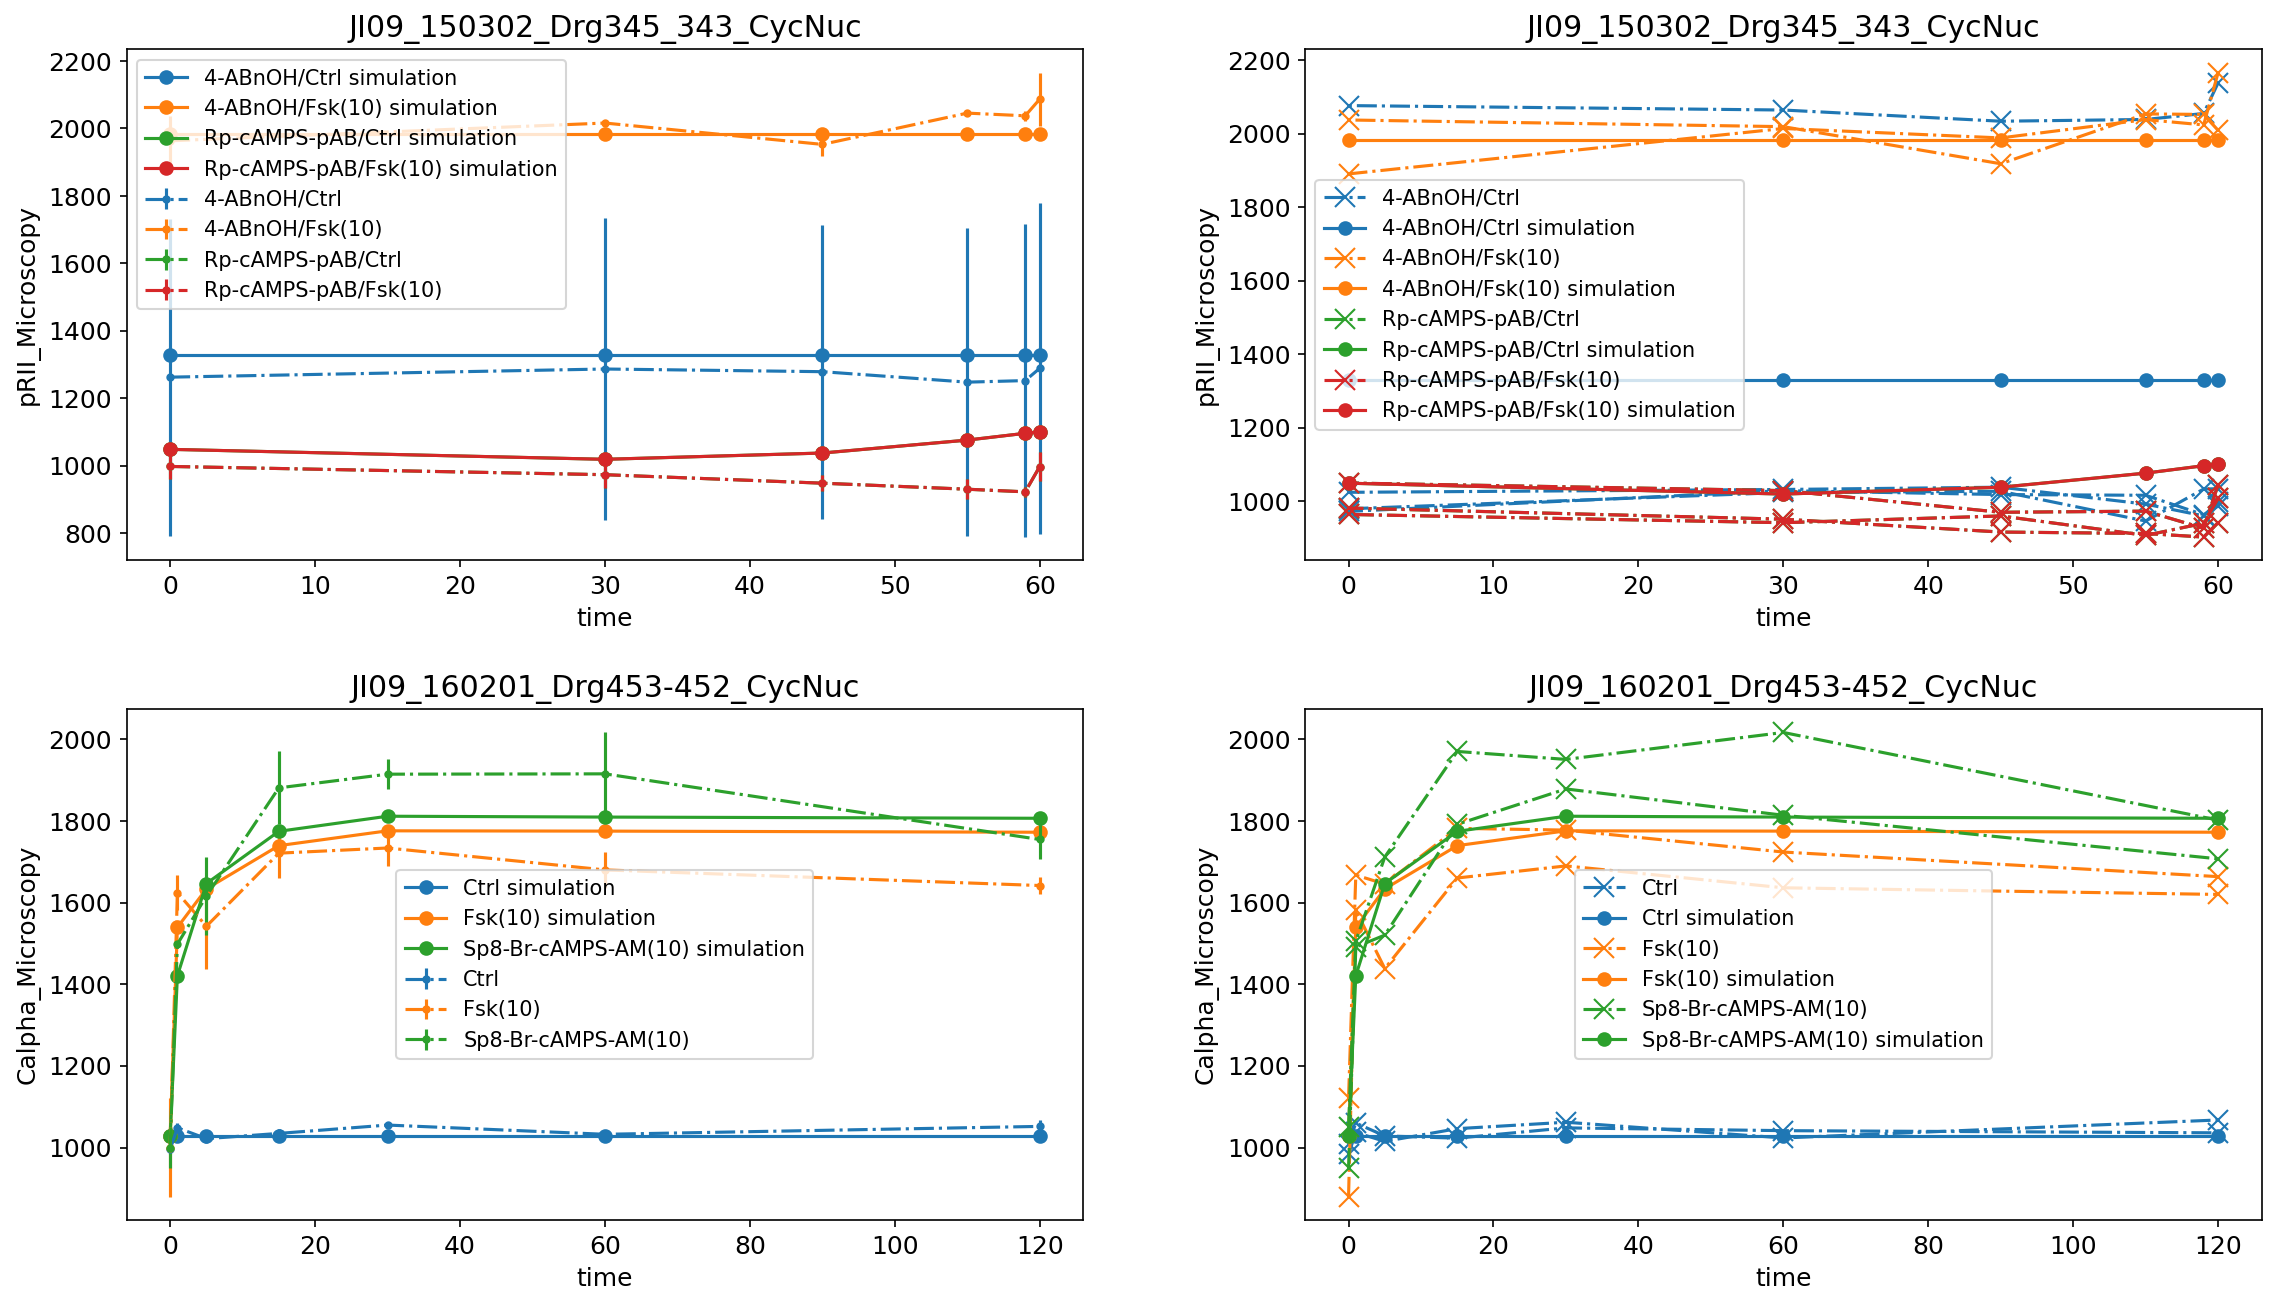

In [18]:
petab_problem = Problem.from_yaml(petab_yaml_isensee)
petab_problem.visualization_df = petab.get_visualization_df(
    example_dir_isensee / "Isensee_visualizationSpecification_replicates.tsv"
)
plot_problem(
    petab_problem,
    simulations_df=example_dir_isensee / "Isensee_simulationData.tsv",
)
plt.gcf().set_size_inches(16, 9)

### Scatter plots

If both measurements and simulated data are available, they can be visualized using scatter plot:

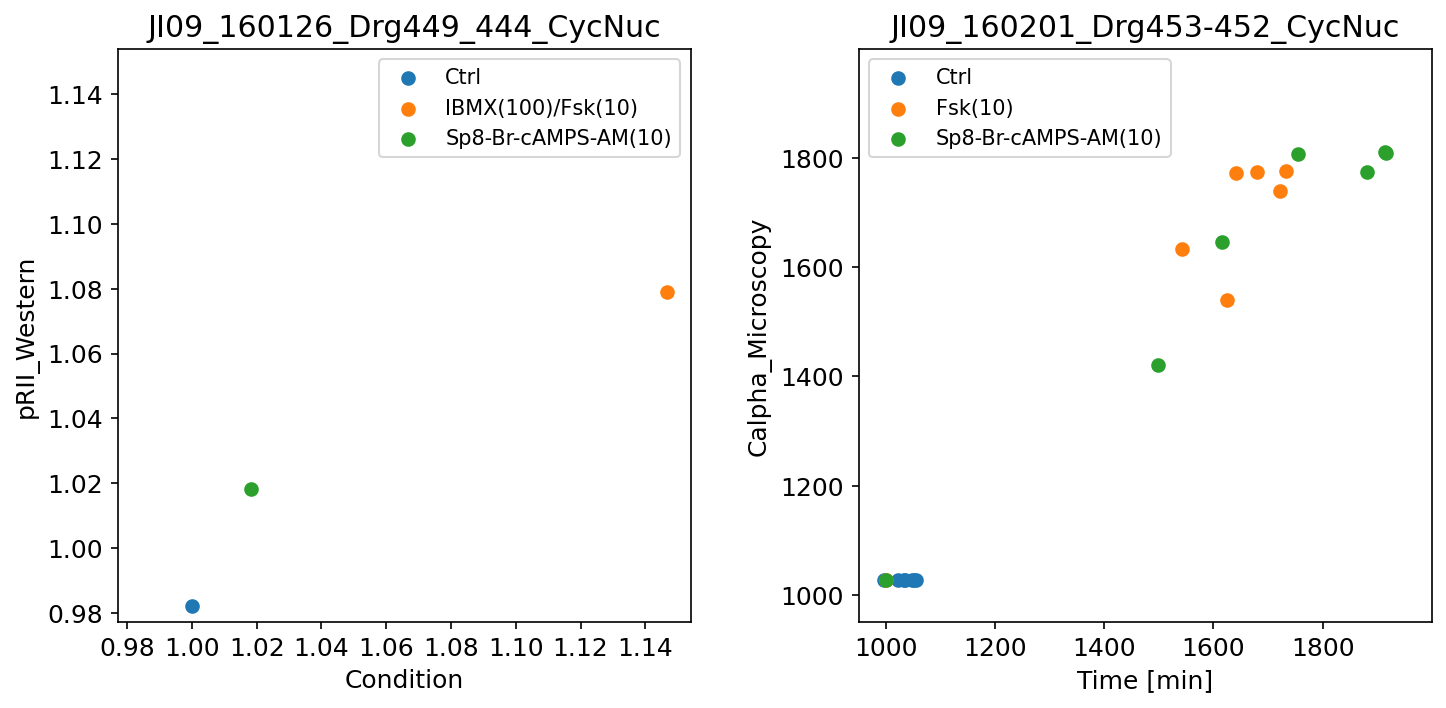

In [19]:
petab_problem = Problem.from_yaml(petab_yaml_isensee)
petab_problem.visualization_df = petab.get_visualization_df(
    example_dir_isensee / "Isensee_visualizationSpecification_scatterplot.tsv"
)
plot_problem(
    petab_problem,
    simulations_df=example_dir_isensee / "Isensee_simulationData.tsv",
)
plt.gcf().set_size_inches(10, 4)

### Further examples

Here are some further visualization examples, including barplots:

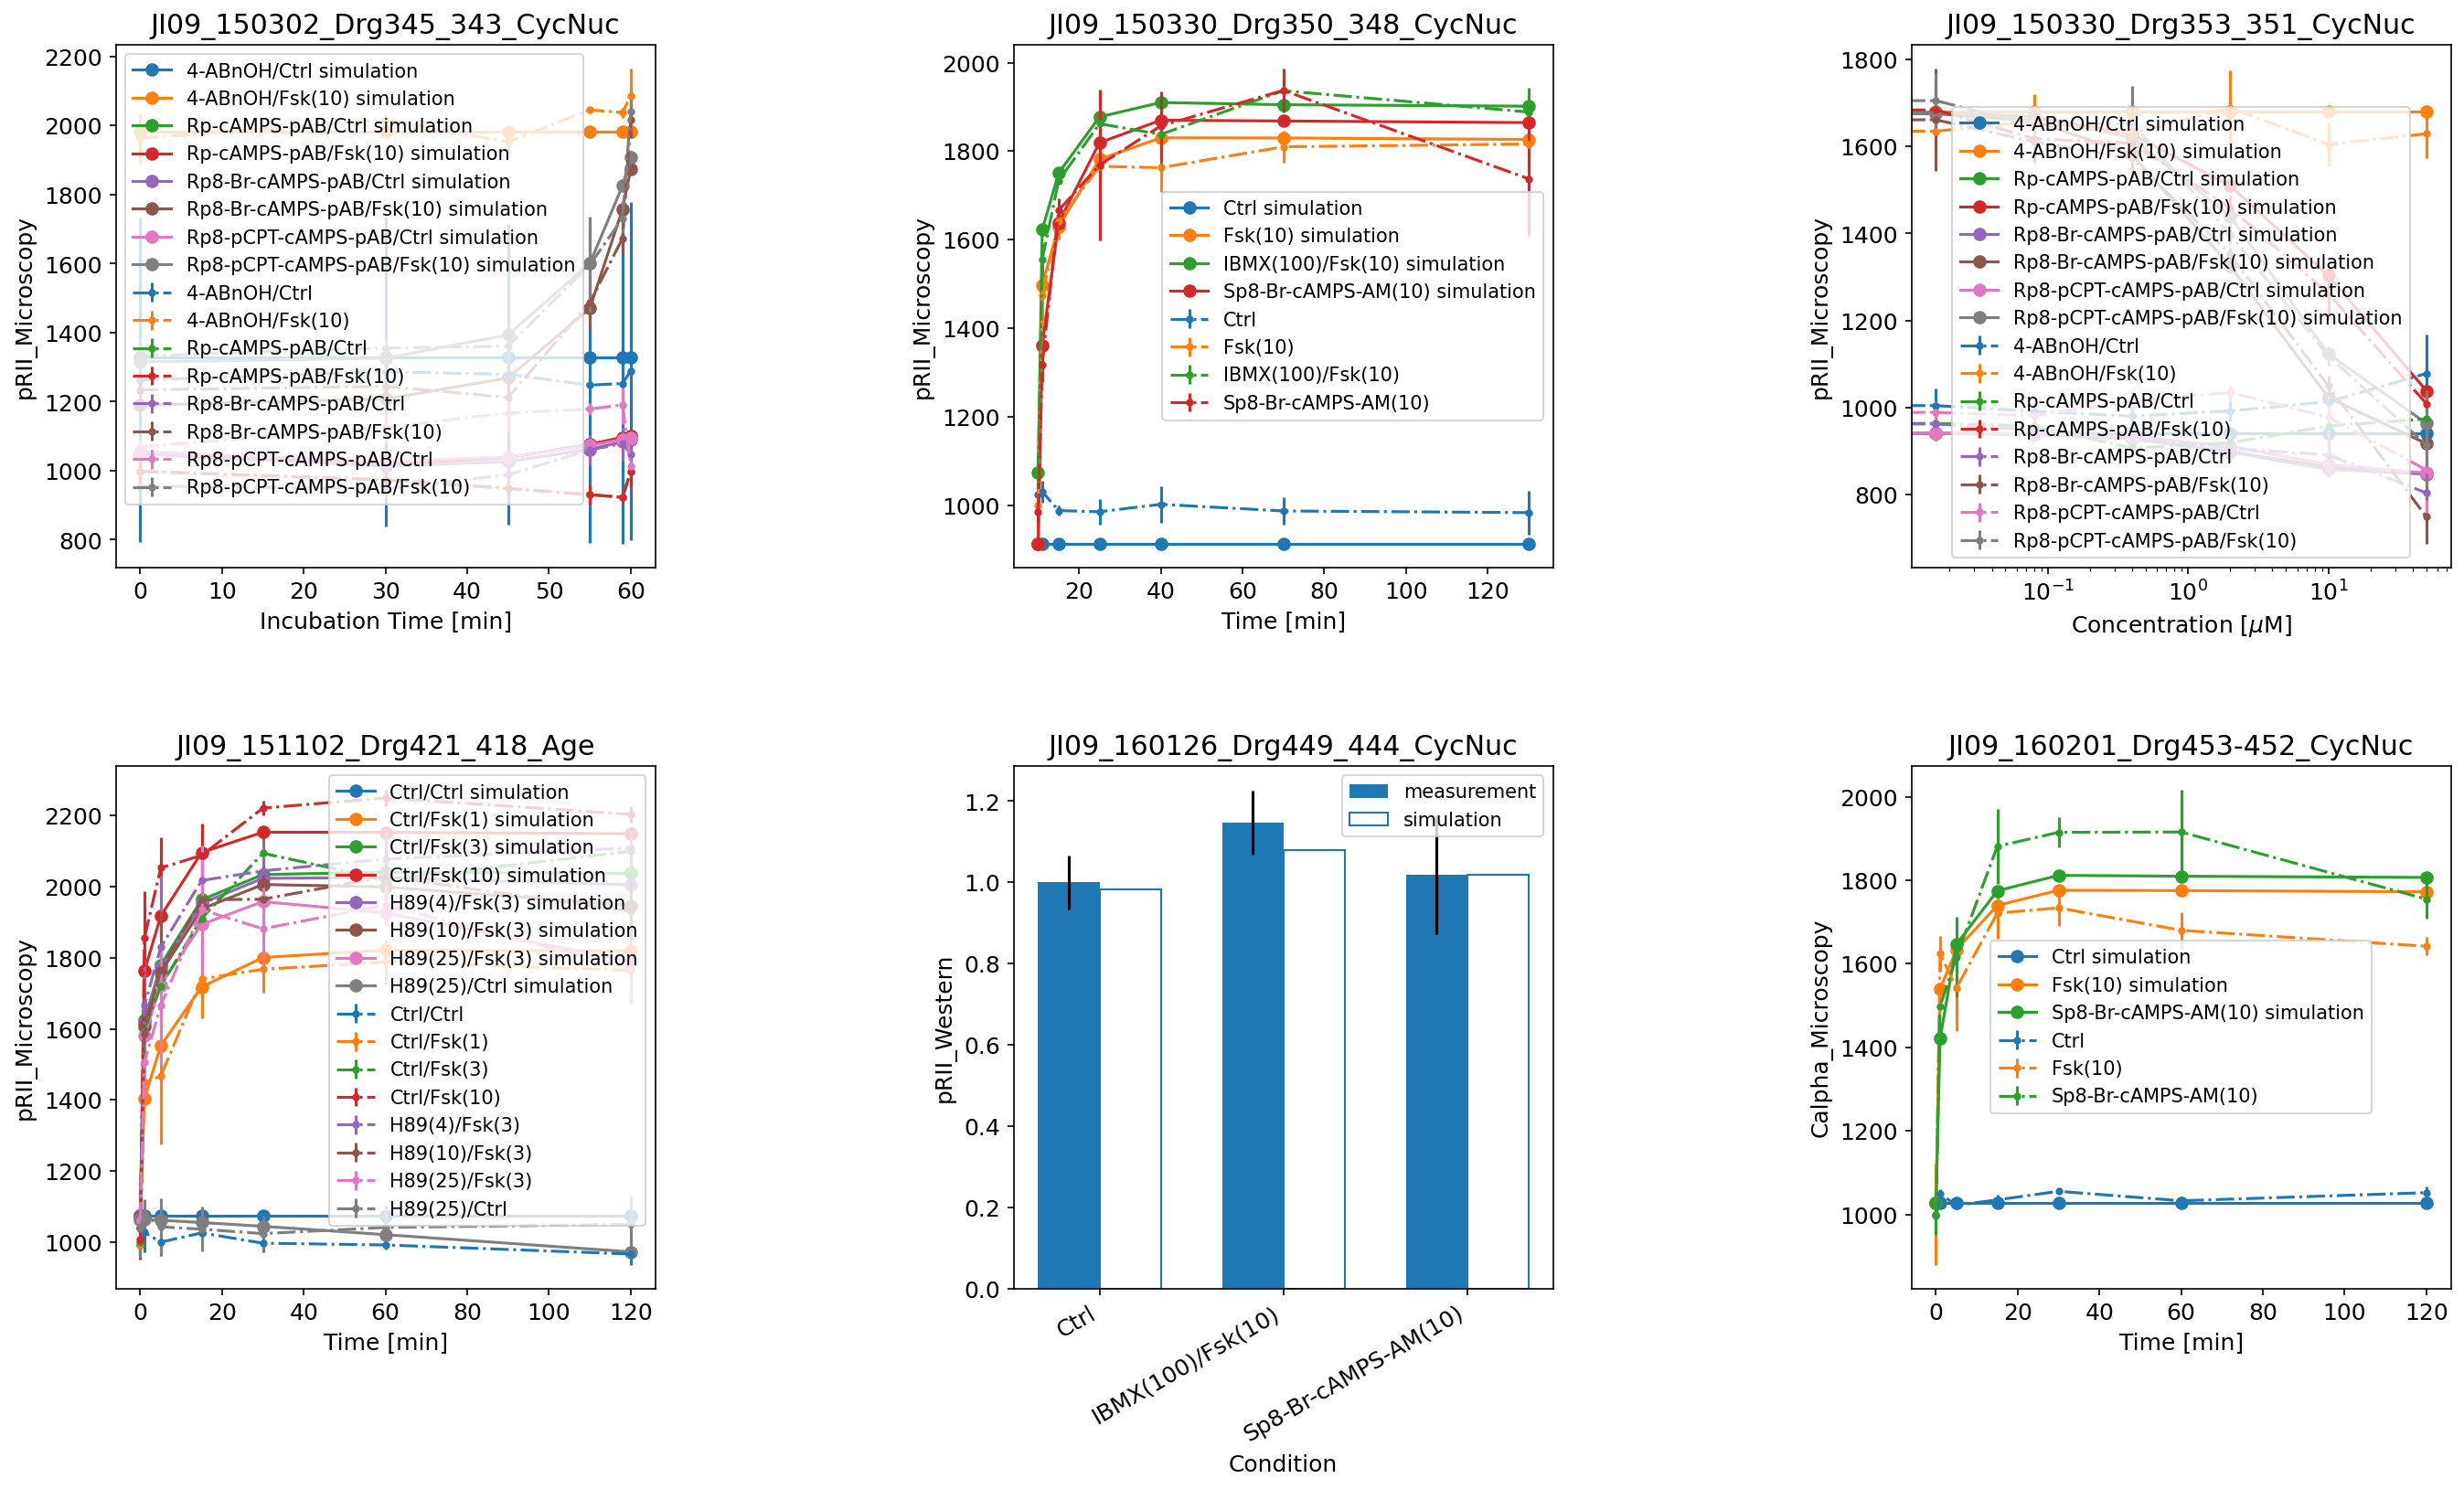

In [20]:
petab_problem = petab.Problem.from_yaml(petab_yaml_isensee_vis)
plot_problem(
    petab_problem,
    simulations_df=example_dir_isensee / "Isensee_simulationData.tsv",
)
plt.gcf().set_size_inches(20, 12)

Also with a visualization file, there is the option to plot only simulations, only measurements, or both, as was illustrated above in the examples without a visualization file.

Refer to the [PEtab documentation](https://petab.readthedocs.io/en/latest/documentation_data_format.html) for descriptions of all possible settings. If you have any questions or encounter some problems, please create a GitHub [issue](https://github.com/PEtab-dev/libpetab-python/issues). We will be happy to help!